Seminario Profesional Big data y Analisis de datos
---

Autores


*   Andres Felipe Rivas Luna
*   Daniel Felipe Galeano Tabares
*   Jorge Andrés Salas Barrera

---



git: https://github.com/LLSphinx/SeminarioBigData

In [ ]:
# Codigo para importar el archivo sin necesidad de tenerlo en la raiz o alguna carpeta em drive

from google.colab import files
uploaded = files.upload()


Saving empresas_colombia.csv to empresas_colombia (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import label_binarize

In [ ]:
# Especificar la ruta del archivo subido
file_path = 'empresas_colombia.csv'

# Cargar el archivo con el delimitador correcto
try:
    df = pd.read_csv(file_path, encoding='latin1', delimiter=';')
    print(df.head())
except Exception as e:
    print(f"Error al cargar el archivo: {e}")


         NIT                   RAZON SOCIAL       SUPERVISOR  \
0  899999068                  ECOPETROL S.A  SUPERFINANCIERA   
1  900112515   REFINERIA DE CARTAGENA S.A.S  SUPERSOCIEDADES   
2  830095213       ORGANIZACION TERPEL S.A.  SUPERFINANCIERA   
3  860069804  CARBONES DEL CERREJON LIMITED  SUPERSOCIEDADES   
4  800021308                   DRUMMOND LTD  SUPERSOCIEDADES   

                  REGIÓN DEPARTAMENTO DOMICILIO         CIUDAD DOMICILIO  \
0  Bogota - Cundinamarca            BOGOTA D.C.  BOGOTA D.C.-BOGOTA D.C.   
1        Costa Atlantica                BOLIVAR        CARTAGENA-BOLIVAR   
2  Bogota - Cundinamarca            BOGOTA D.C.  BOGOTA D.C.-BOGOTA D.C.   
3  Bogota - Cundinamarca            BOGOTA D.C.  BOGOTA D.C.-BOGOTA D.C.   
4  Bogota - Cundinamarca            BOGOTA D.C.  BOGOTA D.C.-BOGOTA D.C.   

   CIIU  MACROSECTOR  INGRESOS OPERACIONALES  GANANCIA (PERDIDA)  \
0   610       MINERO                  144.82               33.41   
1  1921  MANUFACTURA  

In [ ]:

# =============================================
# Selección de Variables Relevantes
# =============================================
relevant_columns = ['MACROSECTOR', 'INGRESOS OPERACIONALES', 'GANANCIA (PERDIDA)', 'TOTAL ACTIVOS', 'TOTAL PASIVOS', 'TOTAL PATRIMONIO']
df_relevant = df[relevant_columns]

# =============================================
# Preprocesamiento de Datos
# =============================================
monetary_columns = ['INGRESOS OPERACIONALES', 'GANANCIA (PERDIDA)', 'TOTAL ACTIVOS', 'TOTAL PASIVOS', 'TOTAL PATRIMONIO']
for col in monetary_columns:
    df_relevant[col] = df_relevant[col].replace('[\$,]', '', regex=True).astype(float)

label_encoder = LabelEncoder()
df_relevant['MACROSECTOR'] = label_encoder.fit_transform(df_relevant['MACROSECTOR'])

X = df_relevant.drop('MACROSECTOR', axis=1)
y = df_relevant['MACROSECTOR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<ipython-input-7-ae13e897590a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant[col] = df_relevant[col].replace('[\$,]', '', regex=True).astype(float)
<ipython-input-7-ae13e897590a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant[col] = df_relevant[col].replace('[\$,]', '', regex=True).astype(float)
<ipython-input-7-ae13e897590a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [ ]:

# =============================================
# Creación del Modelo de Red Neuronal
# =============================================
model = Sequential()
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# =============================================
# Entrenamiento del Modelo
# =============================================
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# =============================================
# Evaluación del Modelo
# =============================================
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                96        
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 6)                 54        
                                                                 
Total params: 286 (1.12 KB)
Trainable params: 286 (1.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
400/400 [==============================] - 2s 3ms/step - loss: 1.5722 - accuracy: 0.3613 - val_loss: 1.4732 - val_accuracy: 0.3831
Epoch 2/50
400/400 [==============================] - 1s 2ms/step - loss: 1.4517 - accuracy: 0.4030 - val_loss: 1.4547 - val_accuracy: 0.4022

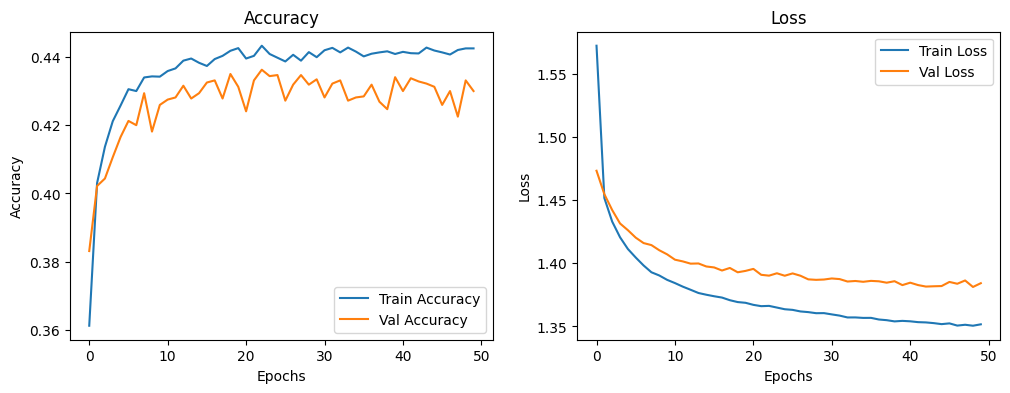

In [ ]:

# =============================================
# Visualización de los Resultados
# =============================================
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


125/125 [==============================] - 0s 2ms/step


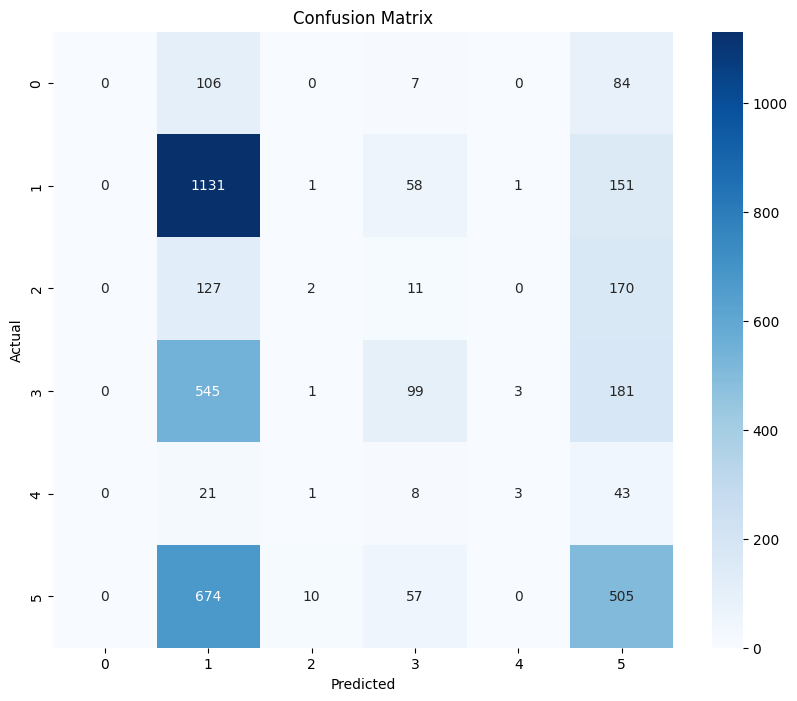

In [ ]:

# =============================================
# Matriz de Confusión
# =============================================
y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


125/125 [==============================] - 1s 4ms/step


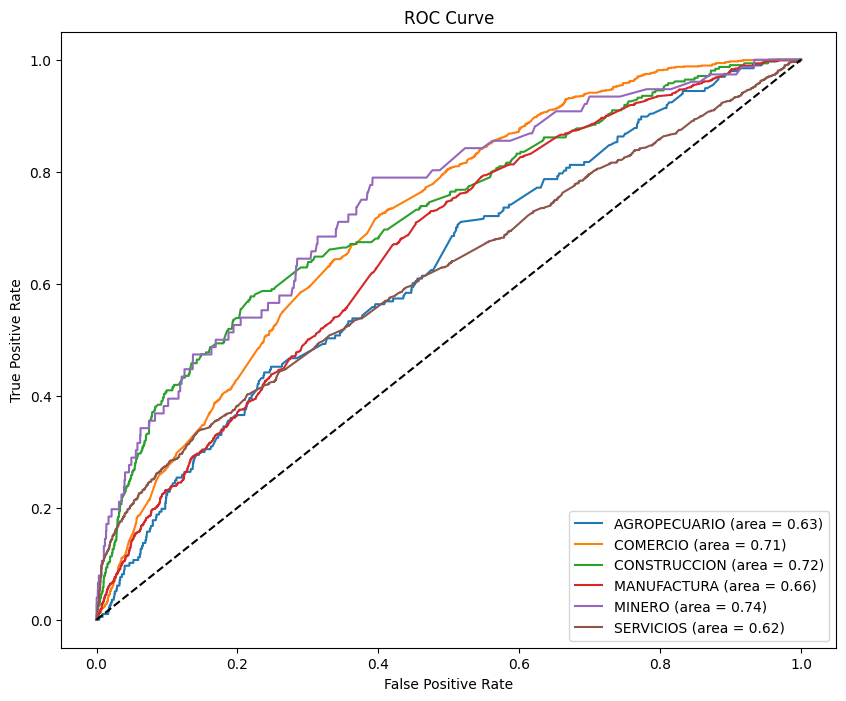

In [ ]:
y_test_binarized = label_binarize(y_test, classes=np.arange(len(np.unique(y))))
n_classes = y_test_binarized.shape[1]
y_score = model.predict(X_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Obtener los nombres de las clases
class_names = label_encoder.inverse_transform(np.arange(n_classes))

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:

# =============================================
# Predicciones y Crecimiento/Decrecimiento de Macrosector
# =============================================
predictions = model.predict(X_test_scaled)
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Actual': label_encoder.inverse_transform(y_test),
    'Predicted': label_encoder.inverse_transform(predicted_classes),
    'Prediction_Probability': np.max(predictions, axis=1)
})


125/125 [==============================] - 0s 1ms/step


         Actual  Predicted  Prediction_Probability
0     SERVICIOS   COMERCIO                0.618559
1     SERVICIOS   COMERCIO                0.620597
2     SERVICIOS   COMERCIO                0.319813
3  CONSTRUCCION  SERVICIOS                0.384694
4      COMERCIO   COMERCIO                0.430638
5      COMERCIO   COMERCIO                0.559366
6      COMERCIO   COMERCIO                0.435212
7   MANUFACTURA   COMERCIO                0.586594
8      COMERCIO   COMERCIO                0.368074
9     SERVICIOS  SERVICIOS                0.833122
      Predicted Prediction_Probability                              
                                  mean       std       min       max
0      COMERCIO               0.454116  0.077015  0.254818  0.875889
1  CONSTRUCCION               0.329109  0.035871  0.265661  0.382234
2   MANUFACTURA               0.401888  0.070162  0.257726  0.800789
3        MINERO               0.552900  0.250101  0.340757  1.000000
4     SERVICIOS          

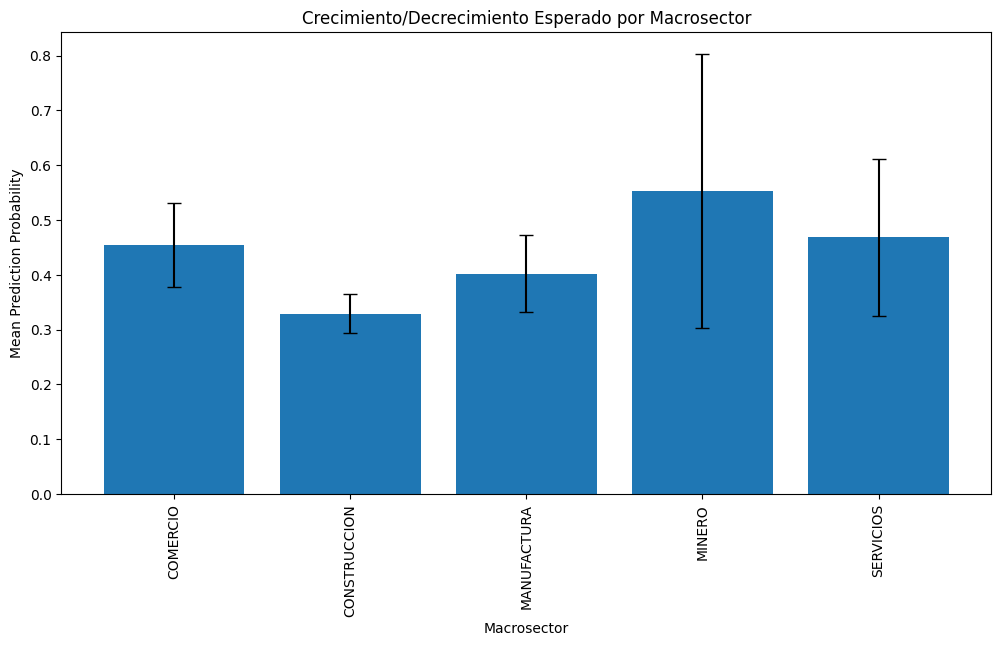

In [ ]:

# Mostrar algunos resultados
print(results_df.head(10))

# Agrupar por el macrosector predicho y calcular estadísticas
grouped_results = results_df.groupby('Predicted').agg({
    'Prediction_Probability': ['mean', 'std', 'min', 'max']
}).reset_index()

# Mostrar los resultados agrupados
print(grouped_results)

# Gráfica de Crecimiento/Decrecimiento Esperado por Macrosector
grouped_results.columns = ['Macrosector', 'Mean Probability', 'Std Probability', 'Min Probability', 'Max Probability']

plt.figure(figsize=(12, 6))
plt.bar(grouped_results['Macrosector'], grouped_results['Mean Probability'], yerr=grouped_results['Std Probability'], capsize=5)
plt.xlabel('Macrosector')
plt.ylabel('Mean Prediction Probability')
plt.title('Crecimiento/Decrecimiento Esperado por Macrosector')
plt.xticks(rotation=90)
plt.show()